**Analisis de la Cesta de compra para el comercio minorista**

Objetivo: las tecnicas de ML implementadas buscan brindar informacion a los comerciantes en cuanto a las asociaciones observadas en las ventas de productos, asi como en las reglas que operan para la rotacion de los mismos.

Alcance: El analsis parte de una limpieza y adecuacion de los datos, posteriormente se crea y entrena el modelo para finalmente deployar a traves de Streamlit en una web que permita interactuar desde el lado del usuario de forma mas rapida y simple con el modelo

Integrantes:

Natia Lombardo
Andrea Juarez
Maria Gomez

*Este Proyecto forma parte de los requerimientos para obtener el certificado de Machine Learning Engenire* en el marco del BOOTCAMP dictado por 4Geek Academy en Uruguay, asupiciado por la Universidad Tecnologica del Centro y el Banco interamericano de Desarrollo.

El repositorio puede encontrarlo en el siguiente link:




https://www.kaggle.com/code/aslanahmedov/market-basket-analysis-apriori-algorithm/notebook

Acerca del conjunto de datos
Análisis de la cesta de la compra
Análisis de cesta de la compra con algoritmo Apriori

El minorista quiere dirigirse a los clientes con sugerencias sobre el conjunto de artículos que es más probable que compre un cliente. Me dieron un conjunto de datos que contiene datos de un minorista; los datos de transacciones proporcionan datos sobre todas las transacciones que han ocurrido durante un período de tiempo. El minorista utilizará el resultado para crecer en su industria y brindar sugerencias de los clientes sobre el conjunto de artículos, podremos aumentar el compromiso del cliente y mejorar la experiencia del cliente e identificar el comportamiento del cliente. Resolveré este problema con el uso del tipo de reglas de asociación de técnica de aprendizaje no supervisado que verifica la dependencia de un elemento de datos en otro elemento de datos.

**Introducción**
La regla de asociación se usa más cuando planea crear una asociación en diferentes objetos en un conjunto. Funciona cuando planea encontrar patrones frecuentes en una base de datos de transacciones. Puede decirle qué artículos compran juntos los clientes con frecuencia y permite que el minorista identifique las relaciones entre los artículos.

Un ejemplo de reglas de asociación
Suponga que hay 100 clientes, 10 de ellos compraron Computer Mouth, 9 compraron Mat for Mouse y 8 compraron ambos.

compró Computer Mouth => compró Tapete para mouse
soporte = P (boca y alfombrilla) = 8/100 = 0,08
confianza = soporte/P(Mat for Mouse) = 0,08/0,09 = 0,89
ascensor = confianza/P (Boca de la computadora) = 0.89/0.10 = 8.9
*Este simple ejemplo. En la práctica, una regla necesita el respaldo de varios cientos de transacciones antes de que pueda considerarse estadísticamente significativa, y los conjuntos de datos suelen contener miles o millones de transacciones*

Nombre de la lista: retaildata
Formato de archivo: . xlsx
Número de observaciones: 522065
Número de atributos: 7

**Diccionario de Datos**
- BillNo: número de 6 dígitos asignado a cada transacción. Nominal.  
- Itemname: Nombre del producto. Nominal.  
- Quantity:Las cantidades de cada producto por transacción. Numérico.  
- Date: El día y la hora en que se generó cada transacción. Numérico.  
- Price: precio del producto. Numérico.  
- CustomerID: número de 5 dígitos asignado a cada cliente. Nominal.  
- Country: Nombre del país donde reside cada cliente. Nominal.  




Metodologia a seguir:

1. Carga de librerias y paquetes
2. ETL del Dataset
3. Aplicacion modelo Apriori 
4. Deploy del modelo mediante GitHub a Heroku

**1.- Carga de librerias y paquetes**

In [58]:
#!pip install mlxtend

Importamos las librerias y paquetes mas importantes entre ellos el ml extender, para encontrar patrones sin puntos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

from funpymodeling.exploratory import freq_tbl
from plotly.offline import plot, iplot, init_notebook_mode

In [2]:
dataset=pd.read_csv('../data/raw/Assignment-1_Data.csv',sep=';')

/tmp/ipykernel_69120/1018422448.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.




**2.- ETL del Dataset**

In [3]:
dataset.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [4]:
dataset.sample(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
288980,563193,BLUE VICTORIAN FABRIC OVAL BOX,1,12.08.2011 16:30,"0,83",NaN,United Kingdom
319152,566035,JUMBO BAG OWLS,10,08.09.2011 13:17,"2,08",12839.0,United Kingdom
224149,557311,SET OF 3 CAKE TINS PANTRY DESIGN,1,19.06.2011 15:36,"4,95",15700.0,United Kingdom
292878,563565,GINGERBREAD MAN COOKIE CUTTER,2,17.08.2011 14:22,"1,25",17338.0,United Kingdom
19453,537898,VINTAGE UNION JACK MEMOBOARD,2,09.12.2010 10:42,"9,95",17377.0,United Kingdom


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [3]:
dataset.describe()

,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


Al analizar las variables numericas me aparecen las cantidades vendidas por cada producto, y las categoricas las analizaremos mas adelante

In [7]:
import funpymodeling

In [8]:
from funpymodeling import freq_tbl

In [9]:
freq_tbl(dataset['Itemname'])

,Itemname,frequency,percentage,cumulative_perc
0,WHITE HANGING HEART T-LIGHT HOLDER,2269,0.004346,0.004358
1,JUMBO BAG RED RETROSPOT,2087,0.003998,0.008367
2,REGENCY CAKESTAND 3 TIER,1930,0.003697,0.012074
3,PARTY BUNTING,1677,0.003212,0.015296
4,LUNCH BAG RED RETROSPOT,1570,0.003007,0.018311
...,...,...,...,...
4180,"FOOD COVER WITH BEADS , SET 2 SIZES",1,0.000002,0.999992
4181,POLYESTER FILLER PAD 60x40cm,1,0.000002,0.999994
4182,damages/credits from ASOS.,1,0.000002,0.999996
4183,samples,1,0.000002,0.999998


lo primero que encontramos en el Dataset es que las portaluces colgantes son el producto mas vendido, con una cantidad total de 2269 unidades.

In [10]:
# buscamos la cantidad de na en el dataset
dataset.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

Tenemos 1455 na en la descripcion del producto y 134041 na en los CustomerId, al ser un dataset grande eliminaremos estas observaciones, tambien removeremos de la descripcion los espacios, y convertiremos el numero de boleta en str

In [11]:
# Limpiamos los datos

dataset['Itemname'] = dataset['Itemname'].str.strip() # aca estamos removiendo los espacios
dataset.dropna(axis=0, subset=['BillNo'], inplace=True) # elimino los na en las boletas
dataset.dropna(axis=0, subset=['CustomerID'], inplace=True) # elimino los na en los id de los clientes 
dataset['BillNo'] = dataset['BillNo']. astype('str') # convertimos el numero de boleta en string
dataset = dataset[~dataset['BillNo'].str.contains('C')] # removemos las posibles transacciones realizadas a credito
dataset.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [12]:
dataset['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Austria                    398
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     17
Saudi Arabia                 9
Name: Country, dtype: int64

In [13]:
freq_tbl(dataset['Country'])

,Country,frequency,percentage,cumulative_perc
0,United Kingdom,354345,0.913206,0.913206
1,Germany,9042,0.023303,0.936509
2,France,8342,0.021499,0.958008
3,Spain,2485,0.006404,0.964412
4,Netherlands,2363,0.006090,0.970502
5,Belgium,2031,0.005234,0.975736
6,Switzerland,1842,0.004747,0.980483
7,Portugal,1462,0.003768,0.984251
8,Australia,1185,0.003054,0.987305
9,Norway,1072,0.002763,0.990068


Lo primero que observamos es que United Kingdom posee el 91% de los datos del dataset, 

In [14]:
# vamos a ver como se comportan las ventas segun mes, o dia
def split_date(data):
    data['Date']=pd.to_datetime(data['Date'])
    data['Year']=data.Date.dt.year
    data['Month']=data.Date.dt.month
    data['Day']=data.Date.dt.day

In [15]:
dataset_min = dataset.copy()

In [16]:
#Spliting our date data into day ,month and year
split_date(dataset_min)
#check how now our data looks like
dataset_min.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,"2,55",17850.0,United Kingdom,2010,1,12
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom,2010,1,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,"2,75",17850.0,United Kingdom,2010,1,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom,2010,1,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom,2010,1,12


In [18]:
dataset_min.describe()

,Quantity,CustomerID,Year,Month,Day
count,388023.000000,388023.000000,388023.000000,388023.000000,388023.000000
mean,12.892140,15316.931710,2010.933795,6.940135,15.723908
std,182.605318,1721.846964,0.248640,3.331492,8.050063
min,1.000000,12346.000000,2010.000000,1.000000,1.000000
25%,2.000000,13950.000000,2011.000000,4.000000,10.000000
50%,5.000000,15265.000000,2011.000000,7.000000,15.000000
75%,12.000000,16837.000000,2011.000000,10.000000,22.000000
max,80995.000000,18287.000000,2011.000000,12.000000,31.000000


El año con mayor venta fue el 2011, ademas de podemos observar que el 75% de los datos se agrupa en este año, veamos la distribucion de estos datos

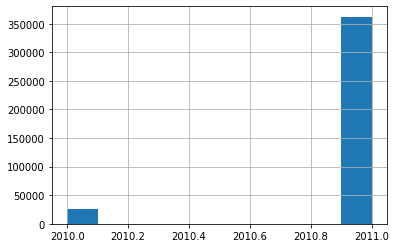

In [19]:
dataset_min['Year'].hist()
plt.show()

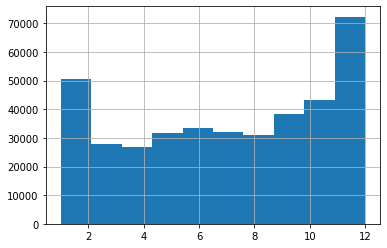

In [20]:
dataset_min['Month'].hist()
plt.show()

Continuaremos con el dataset original para el analisis de los datos, veamos si existen correlaciones entre las variables numericas

In [21]:
dataset.corr()
#no hacer corr con CustomerID

,Quantity,CustomerID
Quantity,1.00000,-0.00599
CustomerID,-0.00599,1.00000


Como reino unido es el que tiene el mayor peso en el dataset, vamos a escoger un Pais para hacer el analisis, y esto tiene sentido si pensamos en los comportamientos de consumidores, los cuales cambian por region, entonces trabajaremos con el segundo Pais de relevancia, Alemania

In [22]:
dataset.shape

(388023, 7)

In [23]:
from itertools import groupby


dataset_germany = (dataset[dataset['Country']== "Germany"].groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo'))

In [24]:
dataset_germany.shape

(457, 1695)

In [25]:
dataset_germany.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Veamos lo que hicimos arriba fue agrupar por factura o boleta para ver en funcion del listado de productos la frecuencia en cada transaccion, en este sentido asi como vemos los datos es como veriamos una cesta. lo que nos importa es su aparacion en cada carrito, entonces cuando el valor es cero, significa que ese producto no estaba en ese carrito y cuando es mayor o igual a 1 si. 

Vamos a definir una funcion que convertira todos los cero o menores que cero a cero y si son mayores a 1 en 1, esto lo hacemos porque es lo que el algoritmo usa o espera como entrada

In [27]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

dataset_germany_set = dataset_germany.applymap(my_encode_units)
dataset_germany_set.drop('POSTAGE', inplace=True, axis=1)

Ahora que ya tenemos el dataset con las caracteristicas esperadas aplicaremos nuestro algoritmo por asociacion


### Analisis de la cesta

In [28]:
df = dataset_germany_set.copy()

In [30]:
df.describe()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,...,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,0.024070,0.004376,0.002188,0.004376,0.021882,0.013129,0.008753,0.004376,0.008753,0.004376,...,0.002188,0.002188,0.002188,0.002188,0.004376,0.002188,0.002188,0.004376,0.004376,0.008753
std,0.153435,0.066082,0.046778,0.066082,0.146458,0.113952,0.093248,0.066082,0.093248,0.066082,...,0.046778,0.046778,0.046778,0.046778,0.066082,0.046778,0.046778,0.066082,0.066082,0.093248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 536527 to 581578
Columns: 1694 entries, 10 COLOUR SPACEBOY PEN to ZINC WILLIE WINKIE  CANDLE STICK
dtypes: int64(1694)
memory usage: 5.9+ MB


In [40]:
#Generamos la frecuencia de los items
df_itemsset = apriori(df, min_support=0.07, use_colnames=True)

/home/trillo/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [41]:
# Creamos las reglas de asociacion
my_rules = association_rules(df_itemsset, metric='lift', min_threshold=1)

In [42]:
# Viasualizamos el top de las 10 reglas o normas de asociacion

my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951
1,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018
5,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427


Mientras mayor es el valor del soporte y la confianza, mayor o mas fuerte la regla de asociacion, hagamos el analisis del primer resultado

In [43]:
my_rules.head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951


Aca estamos observando que cada vez que aparece en el carrito (PLASTERS IN TIN WOODLAND ANIMALS) o yesos en hojalata de animales tambien aparece un set de caja de snack de 4 woodland, esta asociacion tiene un soporte de 7.4% lo que quiere decir que cada 100 carritos esto ocurrio al menos 7 veces, con una confianza de un 53%, estas asociaciones siempre tendran diferentes niveles de confianza dependiendo el producto raiz o inicial. Veamos las veces por ejemplo de las 457 boletas que se compro este producto

In [44]:
dataset_germany_set['PLASTERS IN TIN WOODLAND ANIMALS'].sum()

63

Se compro unas 63 veces de 457, es un 13% de las facturas. 

In [45]:
dataset_germany_set['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

Esto quiere decir que el 100% de las personas que compran el producto A compraron el producto B, lo que quiere decir que podemos recomendar a nuestros clientes que adquieran el producto A que compren el producto B, ahora veamos si solo queremos recomendar los que tienen un nivel de confianza superior al 0.3

In [46]:
my_rules[(my_rules['lift'] >= 3) & (my_rules['confidence'] >= 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540


De esta forma despues de analizar las diferentes rutas o caminos que nos arrojo el algoritmo quedan solo dos, con una confianza de 0.83 o 0.53 respectivamente.

Conclusion: Los procesos o sistemas de recomendacion mas basicos y comunes toman los escenarios detallados y analizan lo que se conoce como canasta de mercado.

In [47]:
my_rules.dtypes

antecedents            object
consequents            object
antecedent support    float64
consequent support    float64
support               float64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
dtype: object

In [51]:
my_rules.antecedents[0]

frozenset({'ROUND SNACK BOXES SET OF4 WOODLAND'})

In [52]:
type(my_rules.antecedents[0])

frozenset

In [53]:
str(my_rules.antecedents[0])

"frozenset({'ROUND SNACK BOXES SET OF4 WOODLAND'})"

In [57]:
import re

In [64]:
re.sub(r'\W+',' ',re.search('({(.*)})', str(my_rules.antecedents[0]))[0]).strip()

'ROUND SNACK BOXES SET OF4 WOODLAND'

Guardamos los resultados en csv que luego tomara nuestra app.py

In [ ]:
my_rules.to_csv('../data/raw/reglas_de_asociacion.csv')

In [ ]:
df_itemsset.to_csv('../data/raw/Dataset_itemsset.csv')